# **Import Library yang dibutuhkan**

In [1]:
# Mengimport Library yang dibutuhkan
import pandas as pd
import re
import seaborn as sns
import matplotlib.pyplot as plt

# **Load Dataset**

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Dataset Ulasan Google Play/scrapped_data_LineGetRich_1.csv")
df.head()

,userName,score,at,content
0,X- Man,1,2024-05-02 23:33:17,Setiap main pasti sinyal menghubungkan padahal...
1,Nori Yanto,1,2024-05-02 22:16:25,MAKIN HARI MAKIN GAK JELAS
2,Arif,1,2024-05-02 21:50:25,Tolong fix lag in game
3,FiQi Koclok,2,2024-05-02 21:50:10,sebenernya bagus gamenya tapi yaaah tau sendir...
4,10.ADITYA YOGA HUTAMA,1,2024-05-02 19:54:54,game kikir game rusak


In [3]:
# Menampilkan Column Content, Username, dan at.
df = df[['content', 'userName', 'at']]
df

,content,userName,at
0,Setiap main pasti sinyal menghubungkan padahal...,X- Man,2024-05-02 23:33:17
1,MAKIN HARI MAKIN GAK JELAS,Nori Yanto,2024-05-02 22:16:25
2,Tolong fix lag in game,Arif,2024-05-02 21:50:25
3,sebenernya bagus gamenya tapi yaaah tau sendir...,FiQi Koclok,2024-05-02 21:50:10
4,game kikir game rusak,10.ADITYA YOGA HUTAMA,2024-05-02 19:54:54
...,...,...,...
592,Terlalu p2w susah bgt buat yg ga punya duit me...,Ayub Alrizki,2024-03-16 14:52:25
593,"Akun line ku hilang, tapi masih ada kata teman...",STAZT *,2024-03-16 13:41:09
594,ok,eja noviandi,2024-03-16 13:30:04
595,Ga kaya getrich 2013 .. Skarang bener2 p2w.. D...,Two Wich,2024-03-16 11:51:49


In [4]:
# Memberikan Informasi terkait Dataset yang digunakan
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 597 entries, 0 to 596
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   content   597 non-null    object
 1   userName  597 non-null    object
 2   at        597 non-null    object
dtypes: object(3)
memory usage: 14.1+ KB


In [5]:
# Menghasilkan statistik deskriptif data dalam Pandas DataFrame atau Series.
df.describe()

,content,userName,at
count,597,597,597
unique,562,595,597
top,Good,Slamet Riyadi,2024-05-02 23:33:17
freq,7,2,1


# **Cleaning Data**

In [6]:
# Mengetahui jumlah berapa baris dan kolom.
df.shape

(597, 3)

In [7]:
# Menghapus data yang duplicate
df = df.drop_duplicates(subset=['content'])

In [8]:
# Mengecek data yang duplikat
df.duplicated().sum()

0

In [9]:
# Menghapus data yang kosong
df = df.dropna()

In [10]:
# Memastikan tidak ada missing value yang tersisa.
df.isnull().sum()

content     0
userName    0
at          0
dtype: int64

In [11]:
df.shape

(562, 3)

In [12]:
def clean_review_text(text): # Membuat Fungsi Cleaning Text
  text = re.sub(r"@[A-Za-z0-9_]+", "", text) # Menghapus Mention
  text = re.sub(r"#\w+", "", text) # Menghapus Hastag
  text = re.sub(r"https?://\S+", "", text) # Menghapus URL

  text = re.sub(r"[^A-Za-z0-9 ]", "", text) # Menghapus Karakter Non Alphanumeric
  text = re.sub(r"\s+", " ", text).strip() # Menghapus Spasi Berlebih

  return text

In [13]:
def remove_emojis(data): # Membuat Fungsi Hapus Emoji
    emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)
    return re.sub(emoj, '', data)

In [14]:
# Mengaplikasikan fungsi yang sudah dibuat kedalam column 'content'
df['content'] = df['content'].apply(clean_review_text, remove_emojis).str.lower()
df

,content,userName,at
0,setiap main pasti sinyal menghubungkan padahal...,X- Man,2024-05-02 23:33:17
1,makin hari makin gak jelas,Nori Yanto,2024-05-02 22:16:25
2,tolong fix lag in game,Arif,2024-05-02 21:50:25
3,sebenernya bagus gamenya tapi yaaah tau sendir...,FiQi Koclok,2024-05-02 21:50:10
4,game kikir game rusak,10.ADITYA YOGA HUTAMA,2024-05-02 19:54:54
...,...,...,...
591,permainan gak masuk akal belum main lawan udah...,Edi Suhendra,2024-03-16 15:24:11
592,terlalu p2w susah bgt buat yg ga punya duit me...,Ayub Alrizki,2024-03-16 14:52:25
593,akun line ku hilang tapi masih ada kata teman ...,STAZT *,2024-03-16 13:41:09
595,ga kaya getrich 2013 skarang bener2 p2w dah ga...,Two Wich,2024-03-16 11:51:49


# **Preprocessing**


1.   Normalisasi
2.   Stopword
3.   Tokenize
4.   Steamming



In [15]:
# 1. Normalisasi

norm = {"yg" : "yang",
        "nyri" : "nyari",
        "cvvk" : "",
        "aplk" : "aplikasi",
        "non ton": "nonton",
        "jg" : "juga",
        "jd" : "jadi",
        "klo" : "kalau",
        "gak" : "tidak",
        "woila" : "",
        "kok" : "kenapa",
        "knp" : "kenapa",
        "apk" : "aplikasi",
        "bgt" : "sangat",
        "ntah" : "tidak tahu",
        "mendem" : "tertekan",
        "ngasih" : "memberi",
        "kek" : "seperti",
        "sepertiurangan" : "",
        "pw" : "paswword",
        "gema" : "game",
        "jgn" : "jangan",
        "gajelas" : "tidak jelas",
        "pantes" : "pantas",
        "aelah" : "",
        "geratis" : "gratis",
        "rawwwwwwwwwwwwwrrrrrrrrr" : "",
        "doanload" : "download",
        "ngebag" : "ngebug",
        "ttk" : "Tiktok",
        "elor" : "error",
        "aee kos www www sz" : "",
        "nasdgm" : "",
        "sekalisaya" : "sekali saya",
        "pcr" : "pacar",
        "ttp" : "tetap",
        "007" : ""
       }

def normalisasi(str_text):
  for i in norm:
    str_text = str_text.replace(i, norm[i])
  return str_text

df['content'] = df['content'].apply(lambda x: normalisasi(x))
df

,content,userName,at
0,setiap main pasti sinyal menghubungkan padahal...,X- Man,2024-05-02 23:33:17
1,makin hari makin tidak jelas,Nori Yanto,2024-05-02 22:16:25
2,tolong fix lag in game,Arif,2024-05-02 21:50:25
3,sebenernya bagus gamenya tapi yaaah tau sendir...,FiQi Koclok,2024-05-02 21:50:10
4,game kikir game rusak,10.ADITYA YOGA HUTAMA,2024-05-02 19:54:54
...,...,...,...
591,permainan tidak masuk akal belum main lawan ud...,Edi Suhendra,2024-03-16 15:24:11
592,terlalu p2w susah sangat buat yang ga punya du...,Ayub Alrizki,2024-03-16 14:52:25
593,akun line ku hilang tapi masih ada kata teman ...,STAZT *,2024-03-16 13:41:09
595,ga kaya getrich 2013 skarang bener2 p2w dah ti...,Two Wich,2024-03-16 11:51:49


In [16]:
# Menginstall Library Sastrawi
!pip install Sastrawi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 209.7/209.7 kB 4.6 MB/s eta 0:00:00


In [17]:
# 2. Stopwords

import Sastrawi
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory, StopWordRemover, ArrayDictionary
more_stop_words = []

stop_words = StopWordRemoverFactory().get_stop_words()
new_array = ArrayDictionary(stop_words)
stop_words_remover_new = StopWordRemover(new_array)

def stopwords(str_text):
  str_text = stop_words_remover_new.remove(str_text)
  return str_text

df['content'] = df['content'].apply(lambda x: stopwords(x))
df

,content,userName,at
0,main sinyal menghubungkan padahal udh pakai wi...,X- Man,2024-05-02 23:33:17
1,makin hari makin jelas,Nori Yanto,2024-05-02 22:16:25
2,fix lag in game,Arif,2024-05-02 21:50:25
3,sebenernya bagus gamenya yaaah tau sendirilah,FiQi Koclok,2024-05-02 21:50:10
4,game kikir game rusak,10.ADITYA YOGA HUTAMA,2024-05-02 19:54:54
...,...,...,...
591,permainan masuk akal main lawan udah complete ...,Edi Suhendra,2024-03-16 15:24:11
592,terlalu p2w susah sangat buat ga punya duit me...,Ayub Alrizki,2024-03-16 14:52:25
593,akun line ku hilang masih kata teman ku loginn...,STAZT *,2024-03-16 13:41:09
595,ga kaya getrich 2013 skarang bener2 p2w dah se...,Two Wich,2024-03-16 11:51:49


In [18]:
# Tokenize
tokenized = df['content'].apply(lambda x:x.split())
tokenized

0      [main, sinyal, menghubungkan, padahal, udh, pa...
1                            [makin, hari, makin, jelas]
2                                   [fix, lag, in, game]
3      [sebenernya, bagus, gamenya, yaaah, tau, sendi...
4                             [game, kikir, game, rusak]
                             ...                        
591    [permainan, masuk, akal, main, lawan, udah, co...
592    [terlalu, p2w, susah, sangat, buat, ga, punya,...
593    [akun, line, ku, hilang, masih, kata, teman, k...
595    [ga, kaya, getrich, 2013, skarang, bener2, p2w...
596    [game, ngk, ngotak, sih, masa, tiap, main, bel...
Name: content, Length: 562, dtype: object

In [19]:
# # Steamming

# from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

# def stemming(text_cleaning):
#     factory = StemmerFactory()
#     stemmer = factory.create_stemmer()
#     stemmed_words = [stemmer.stem(w) for w in text_cleaning]
#     return " ".join(stemmed_words)

# tokenized = tokenized.apply(stemming)

# tokenized.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_LineGetrich_1.csv', index = False)


In [20]:
df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_LineGetrich_1.csv', encoding = 'latin1')
df_clean

,content
0,main sinyal hubung padahal udh pakai wifi wifi...
1,makin hari makin jelas
2,fix lag in game
3,sebenernya bagus gamenya yaaah tau sendiri
4,game kikir game rusak
...,...
557,main masuk akal main lawan udah complete sendi...
558,terlalu p2w susah sangat buat ga punya duit me...
559,akun line ku hilang masih kata teman ku loginn...
560,ga kaya getrich 2013 skarang bener2 p2w dah se...


# **Translate**

In [21]:
# # Menginstall Library easynmt
# !pip install -U easynmt

In [22]:
# import pandas as pd
# from easynmt import EasyNMT

In [23]:
# df_clean = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_preprocessing_LineGetrich_1.csv', encoding='latin1')

In [24]:
# source_lang = 'id'  # Replace with the source language of your data
# target_lang = 'en'  # Replace with the target language

In [25]:
# model = EasyNMT('opus-mt')  # You can choose a different model name here

In [26]:
# df2 = df_clean.fillna(method = 'pad')
# df2

In [27]:
# df2['content_en'] = df2['content'].apply(lambda x: model.translate(x, source_lang=source_lang, target_lang=target_lang))
# df2.to_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_LineGetrich_1.csv')

In [28]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_LineGetrich_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,main sinyal hubung padahal udh pakai wifi wifi...,Playing signal when you're using fast Wi-Fi. T...
1,1,makin hari makin jelas,The more the day becomes clear.
2,2,fix lag in game,fix lag in game
3,3,sebenernya bagus gamenya yaaah tau sendiri,"It's a good game. Yeah, it's a good game."
4,4,game kikir game rusak,game file game is broken
...,...,...,...
557,557,main masuk akal main lawan udah complete sendi...,Makes sense. Play your own games.
558,558,terlalu p2w susah sangat buat ga punya duit me...,too p2w It's so hard not to have money to win ...
559,559,akun line ku hilang masih kata teman ku loginn...,My line account is missing. Still says my frie...
560,560,ga kaya getrich 2013 skarang bener2 p2w dah se...,Not rich Getrich 2013. Now it's really hot. Th...


# **Labeling**

In [29]:
df2 = pd.read_csv('/content/drive/MyDrive/Dataset Ulasan Google Play/hasil_terjemahan_LineGetrich_1.csv')
df2

,Unnamed: 0,content,content_en
0,0,main sinyal hubung padahal udh pakai wifi wifi...,Playing signal when you're using fast Wi-Fi. T...
1,1,makin hari makin jelas,The more the day becomes clear.
2,2,fix lag in game,fix lag in game
3,3,sebenernya bagus gamenya yaaah tau sendiri,"It's a good game. Yeah, it's a good game."
4,4,game kikir game rusak,game file game is broken
...,...,...,...
557,557,main masuk akal main lawan udah complete sendi...,Makes sense. Play your own games.
558,558,terlalu p2w susah sangat buat ga punya duit me...,too p2w It's so hard not to have money to win ...
559,559,akun line ku hilang masih kata teman ku loginn...,My line account is missing. Still says my frie...
560,560,ga kaya getrich 2013 skarang bener2 p2w dah se...,Not rich Getrich 2013. Now it's really hot. Th...


In [30]:
# Menginstall Library Text-Blob, Worldcould, dan NLTK
!pip install tweet-preprocessor
!pip install textblob
!pip install wordcloud
!pip install nltk

In [31]:
import preprocessor as p
from textblob import TextBlob
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [32]:
data_review = list(df2['content_en'])
polaritas = 0

status = []
total_positif = total_negatif = total_netral = total = 0

for i, review in enumerate(data_review):
    analysis = TextBlob(str(review))
    polaritas += analysis.polarity

    if analysis.sentiment.polarity > 0.0:
        total_positif += 1
        status.append("Positif")
    elif analysis.sentiment.polarity == 0.0:
        total_netral += 1
        status.append("Netral")
    else:
        total_negatif += 1
        status.append("Negatif")

    total += 1

print(f"Hasil Analisis Data :\nPositif = {total_positif}\nNetral = {total_netral}\nNegatif = {total_negatif}")
print(f"\nTotal Data Seluruhnya : {total}")

Hasil Analisis Data :
Positif = 224
Netral = 147
Negatif = 191

Total Data Seluruhnya : 562


In [33]:
df2['sentimen'] = status
df2

,Unnamed: 0,content,content_en,sentimen
0,0,main sinyal hubung padahal udh pakai wifi wifi...,Playing signal when you're using fast Wi-Fi. T...,Positif
1,1,makin hari makin jelas,The more the day becomes clear.,Positif
2,2,fix lag in game,fix lag in game,Negatif
3,3,sebenernya bagus gamenya yaaah tau sendiri,"It's a good game. Yeah, it's a good game.",Positif
4,4,game kikir game rusak,game file game is broken,Negatif
...,...,...,...,...
557,557,main masuk akal main lawan udah complete sendi...,Makes sense. Play your own games.,Positif
558,558,terlalu p2w susah sangat buat ga punya duit me...,too p2w It's so hard not to have money to win ...,Positif
559,559,akun line ku hilang masih kata teman ku loginn...,My line account is missing. Still says my frie...,Negatif
560,560,ga kaya getrich 2013 skarang bener2 p2w dah se...,Not rich Getrich 2013. Now it's really hot. Th...,Positif


In [34]:
# Menghapus Colum Unnamed: 0
data = df2.drop(columns=['Unnamed: 0'])
data

,content,content_en,sentimen
0,main sinyal hubung padahal udh pakai wifi wifi...,Playing signal when you're using fast Wi-Fi. T...,Positif
1,makin hari makin jelas,The more the day becomes clear.,Positif
2,fix lag in game,fix lag in game,Negatif
3,sebenernya bagus gamenya yaaah tau sendiri,"It's a good game. Yeah, it's a good game.",Positif
4,game kikir game rusak,game file game is broken,Negatif
...,...,...,...
557,main masuk akal main lawan udah complete sendi...,Makes sense. Play your own games.,Positif
558,terlalu p2w susah sangat buat ga punya duit me...,too p2w It's so hard not to have money to win ...,Positif
559,akun line ku hilang masih kata teman ku loginn...,My line account is missing. Still says my frie...,Negatif
560,ga kaya getrich 2013 skarang bener2 p2w dah se...,Not rich Getrich 2013. Now it's really hot. Th...,Positif


# **Visualisasi**


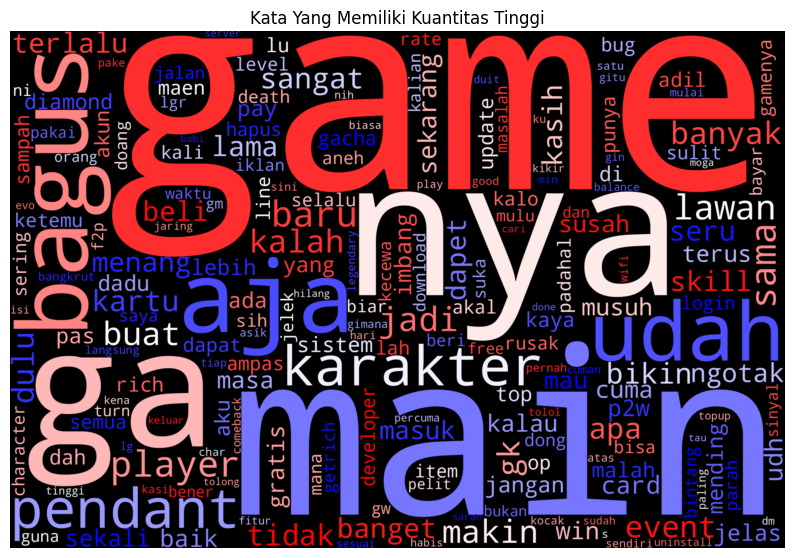

In [35]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

def plot_cloud(wordcloud):
    plt.figure(figsize=(10, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title('Kata Yang Memiliki Kuantitas Tinggi')
    plt.axis('off')
    plt.show()

all_words = ' '.join([reviews for reviews in df2['content']])

wordcloud = WordCloud(width=3000,
                      height=2000,
                      random_state=3,
                      background_color='black',
                      colormap='bwr',
                      collocations=False,
                      stopwords=STOPWORDS).generate(all_words)

plot_cloud(wordcloud)


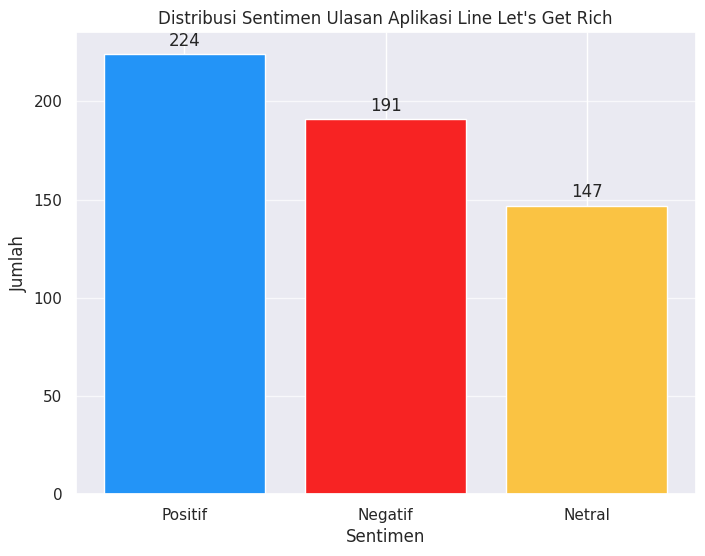

In [36]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif', 'Netral']
counts = [total_positif, total_negatif, total_netral]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Line Let's Get Rich")


In [37]:
# Menghapus Sentimen Netral
data = data[data['sentimen'] != 'Netral']
data

,content,content_en,sentimen
0,main sinyal hubung padahal udh pakai wifi wifi...,Playing signal when you're using fast Wi-Fi. T...,Positif
1,makin hari makin jelas,The more the day becomes clear.,Positif
2,fix lag in game,fix lag in game,Negatif
3,sebenernya bagus gamenya yaaah tau sendiri,"It's a good game. Yeah, it's a good game.",Positif
4,game kikir game rusak,game file game is broken,Negatif
...,...,...,...
556,ku bagus banyak ngeleg belakang,I'm good. Back a lot.,Positif
557,main masuk akal main lawan udah complete sendi...,Makes sense. Play your own games.,Positif
558,terlalu p2w susah sangat buat ga punya duit me...,too p2w It's so hard not to have money to win ...,Positif
559,akun line ku hilang masih kata teman ku loginn...,My line account is missing. Still says my frie...,Negatif


In [38]:
data = data.replace({'Positif':1, 'Negatif':0})
data

,content,content_en,sentimen
0,main sinyal hubung padahal udh pakai wifi wifi...,Playing signal when you're using fast Wi-Fi. T...,1
1,makin hari makin jelas,The more the day becomes clear.,1
2,fix lag in game,fix lag in game,0
3,sebenernya bagus gamenya yaaah tau sendiri,"It's a good game. Yeah, it's a good game.",1
4,game kikir game rusak,game file game is broken,0
...,...,...,...
556,ku bagus banyak ngeleg belakang,I'm good. Back a lot.,1
557,main masuk akal main lawan udah complete sendi...,Makes sense. Play your own games.,1
558,terlalu p2w susah sangat buat ga punya duit me...,too p2w It's so hard not to have money to win ...,1
559,akun line ku hilang masih kata teman ku loginn...,My line account is missing. Still says my frie...,0


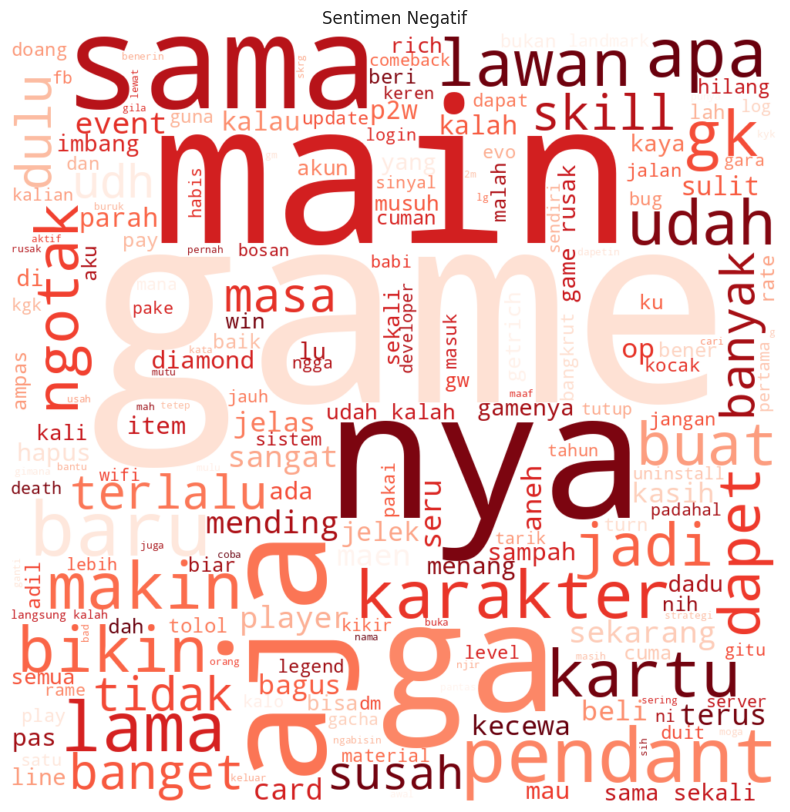

In [39]:
# Visualisasi Wordcould Positif & Negatif

data_negatif = data[data['sentimen'] == 0]
data_positif = data[data['sentimen'] == 1]

all_words = ' '.join([reviews for reviews in data_negatif['content']])
wordcloud = WordCloud(colormap='Reds', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Negatif")
plt.margins(x=0, y=0)
plt.show()

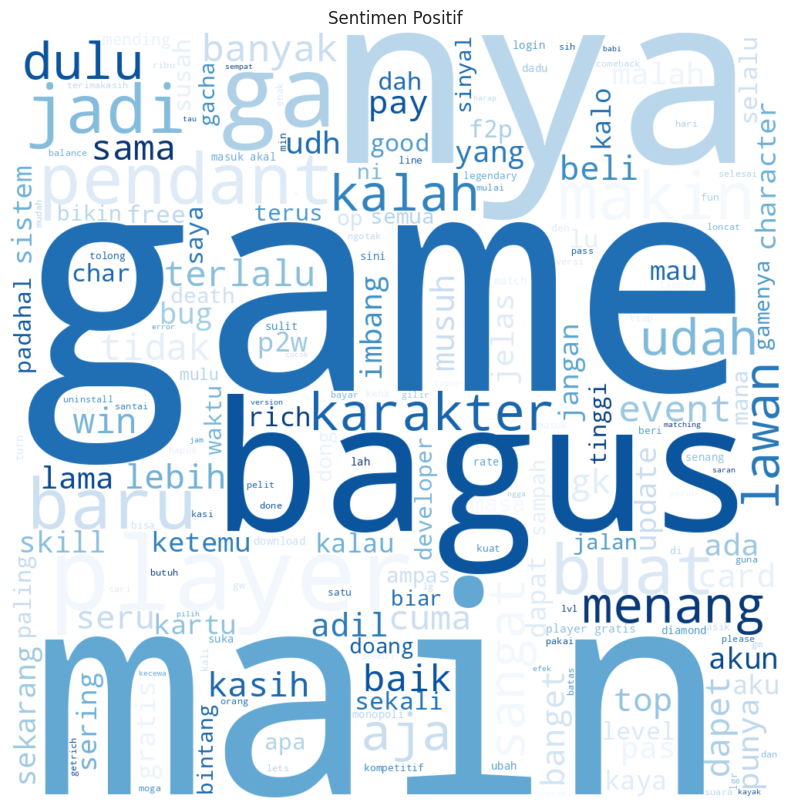

In [40]:
all_words = ' '.join([reviews for reviews in data_positif['content']])
wordcloud = WordCloud(colormap='Blues', width=1000, height=1000, mode='RGBA', background_color='white').generate(all_words)
plt.figure(figsize=(20, 10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Sentimen Positif")
plt.margins(x=0, y=0)
plt.show()

In [41]:
# Menghitung Jumlah Sentimen Negatif dan Positif
data['sentimen'].value_counts()

sentimen
1    224
0    191
Name: count, dtype: int64

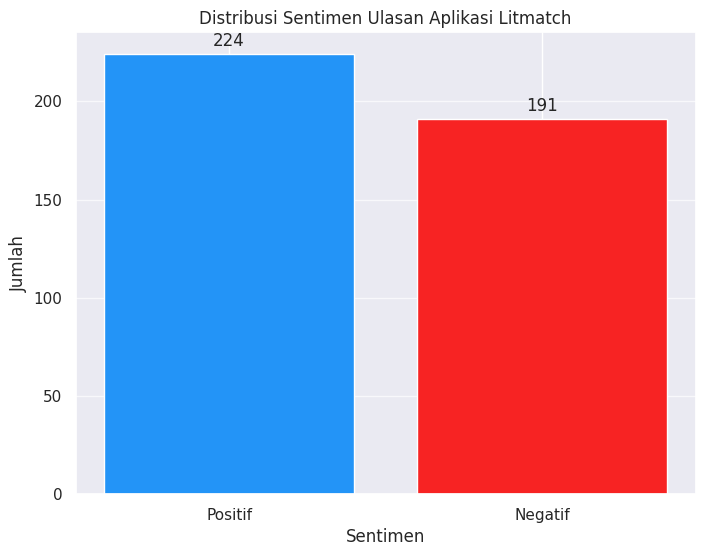

In [42]:
import seaborn as sns

sns.set_theme()

labels = ['Positif', 'Negatif']
counts = [total_positif, total_negatif]

def show_bar_chart(labels, counts, title):
    fig, ax = plt.subplots(figsize=(8,6))
    bars = ax.bar(labels, counts, color=['#2394f7', '#f72323', '#fac343'])

    for bar, count in zip(bars, counts):
        height = bar.get_height()
        ax.annotate(f'{count}', xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

    ax.grid(axis='y', linestyle='-', alpha=0.7)

    ax.set_xlabel('Sentimen')
    ax.set_ylabel('Jumlah')
    ax.set_title(title)

    plt.show()

show_bar_chart(labels, counts, "Distribusi Sentimen Ulasan Aplikasi Litmatch")

# **Data Preparation & Modeling**

In [43]:
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import confusion_matrix

In [44]:
# Memisahkan data menjadi data latih dan data uji
X = data['content']
y = data['sentimen']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [45]:
X_train

335    main get rich sejak 2014 maap saya beri rating...
489    susah banget event pendantnya udah abis 3000 d...
256    kangen get rich dulu mana banyak player kompet...
205                                     nostalgia banget
5      udah bagus tolong magic land balikin kayak dul...
                             ...                        
96     game adil susah karakter pendant beli lawan ma...
149                          sumpah ni game bagus banget
364    really gm i have 14k diamon and got nothing fo...
465    game jelek sampah mah matre suruh topup buat d...
143    gimana sih kata event blue sampe tgl 3 udh gan...
Name: content, Length: 332, dtype: object

In [46]:
# Menggunakan CountVectorizer untuk mengubah teks menjadi fitur numerik
vectorizer = CountVectorizer()
vectorizer.fit(X_train)


CountVectorizer()

In [47]:
X_train_vec = vectorizer.transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [48]:
X_train_vec.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [49]:
for c in [0.01, 0.05, 0.25, 0.5, 0.75, 1]:
  svm = LinearSVC(C=c)
  svm.fit(X_train_vec, y_train)
  print('Akurasi untuk c = %s: %s' %(c, accuracy_score(y_test, svm.predict(X_test_vec))))

Akurasi untuk c = 0.01: 0.6867469879518072
Akurasi untuk c = 0.05: 0.7228915662650602
Akurasi untuk c = 0.25: 0.7349397590361446
Akurasi untuk c = 0.5: 0.7349397590361446
Akurasi untuk c = 0.75: 0.7469879518072289
Akurasi untuk c = 1: 0.7590361445783133


In [50]:
svm = LinearSVC(C = 1.0)
svm.fit(X_train_vec, y_train)

LinearSVC()

In [51]:
print('Accuracy score model final: %s ' %accuracy_score(y_test, svm.predict(X_test_vec)))

Accuracy score model final: 0.7590361445783133 


In [52]:
y_pred = svm.predict(X_test_vec)
print('Accuracy Of SVM Classfier On Test Set: {:.2f}' .format(svm.score(X_test_vec, y_test)))

confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)
print(classification_report(y_test, y_pred))


Accuracy Of SVM Classfier On Test Set: 0.76
[[29  8]
 [12 34]]
              precision    recall  f1-score   support

           0       0.71      0.78      0.74        37
           1       0.81      0.74      0.77        46

    accuracy                           0.76        83
   macro avg       0.76      0.76      0.76        83
weighted avg       0.76      0.76      0.76        83



# **Testing**


In [54]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = svm.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : sering kalah gara gara jaringan , lawan p2w
Hasil Analisis Sentimen Untuk Teks Baru : Negatif


In [57]:
new_text = input("\nMasukkan Teks Baru : ")
new_text_vec = vectorizer.transform([new_text])
predicted_sentimen = svm.predict(new_text_vec)

if predicted_sentimen[0] == 1:
    sentimen_label = "Positif"
elif predicted_sentimen[0] == 0:
    sentimen_label = "Negatif"

print("Hasil Analisis Sentimen Untuk Teks Baru :", sentimen_label)


Masukkan Teks Baru : bagus sering dapet bansos
Hasil Analisis Sentimen Untuk Teks Baru : Positif
